In [28]:
import IPython
import os
os.system("ls [a-z]*.md | grep -v 'ports\.md' |grep -v audris | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files

['abanks19', 'ahende39', 'ahughe51', 'amalviya', 'astjohn1', 'asuther8', 'avo5', 'azou', 'bgreenb3', 'bmingled', 'bperosa', 'ciadonis', 'cukaegbu', 'dlomax', 'dmaioran', 'dschult9', 'dtroutm1', 'fxie6', 'fxu11', 'gbrown39', 'hkitts2', 'jcarmac3', 'jhamil53', 'jhammer2', 'jhills', 'jlemon3', 'jmatloc1', 'jmoczadl', 'jmuncy2', 'jnotowic', 'kcavitt', 'kleland', 'klim7', 'kpatel87', 'lgonzal6', 'mdixson2', 'mjahansh', 'mmohandi', 'mmuszik1', 'moliaee2', 'mrm634', 'mxw557', 'plin5', 'ppatel91', 'psherri1', 'pvelas', 'rbarklow', 'rbhupati', 'rbray2', 'reehsemm', 'rrusitan', 'rstewa35', 'rwill148', 'showel17', 'shwang6', 'spatel91', 'sxue3', 'tainley', 'tflorey', 'tnguye85', 'vaiely', 'wcoar', 'wjohns53', 'wsquires', 'xcao14', 'yli53']


In [29]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [30]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,abanks19,ahende39,ahughe51,amalviya,astjohn1,asuther8,avo5,azou,bgreenb3,bmingled,...,sxue3,tainley,tflorey,tnguye85,vaiely,wcoar,wjohns53,wsquires,xcao14,yli53
abanks19,1.000,0.098,0.083,0.080,0.055,0.074,0.087,0.124,0.067,0.102,...,0.165,0.130,0.130,0.086,0.137,0.092,0.125,0.060,0.088,0.085
ahende39,0.098,1.000,0.134,0.078,0.075,0.085,0.085,0.198,0.113,0.103,...,0.154,0.133,0.110,0.089,0.152,0.158,0.157,0.042,0.133,0.114
ahughe51,0.083,0.134,1.000,0.048,0.063,0.150,0.083,0.143,0.086,0.137,...,0.115,0.050,0.061,0.057,0.124,0.155,0.069,0.090,0.082,0.116
amalviya,0.080,0.078,0.048,1.000,0.069,0.103,0.216,0.062,0.148,0.165,...,0.156,0.036,0.075,0.084,0.094,0.083,0.116,0.083,0.158,0.098
astjohn1,0.055,0.075,0.063,0.069,1.000,0.066,0.063,0.078,0.105,0.047,...,0.125,0.095,0.082,0.068,0.066,0.120,0.075,0.051,0.178,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wcoar,0.092,0.158,0.155,0.083,0.120,0.116,0.066,0.128,0.099,0.098,...,0.100,0.086,0.088,0.065,0.123,1.000,0.075,0.068,0.090,0.115
wjohns53,0.125,0.157,0.069,0.116,0.075,0.099,0.153,0.116,0.138,0.134,...,0.189,0.139,0.123,0.191,0.141,0.075,1.000,0.065,0.124,0.157
wsquires,0.060,0.042,0.090,0.083,0.051,0.110,0.067,0.052,0.069,0.093,...,0.126,0.060,0.030,0.034,0.055,0.068,0.065,1.000,0.075,0.041
xcao14,0.088,0.133,0.082,0.158,0.178,0.131,0.174,0.197,0.181,0.129,...,0.150,0.122,0.229,0.058,0.106,0.090,0.124,0.075,1.000,0.169


0.6506966172114266
dlomax jhammer2 wsquires kleland asuther8 hkitts2 
spatel91 dschult9 mjahansh tainley rbhupati vaiely 
rbarklow shwang6 azou fxie6 abanks19 gbrown39 
kcavitt psherri1 pvelas ahughe51 jmuncy2 amalviya 
jlemon3 mmohandi showel17 avo5 mxw557 jnotowic 
tnguye85 wcoar ahende39 rbray2 jhills mdixson2 
wjohns53 bmingled dtroutm1 bperosa jhamil53 mmuszik1 
jmatloc1 rwill148 cukaegbu yli53 mrm634 dmaioran 
jmoczadl tflorey xcao14 rrusitan sxue3 ppatel91 
kpatel87 rstewa35 bgreenb3 reehsemm lgonzal6 plin5 
ciadonis jcarmac3 astjohn1 moliaee2 fxu11 klim7 


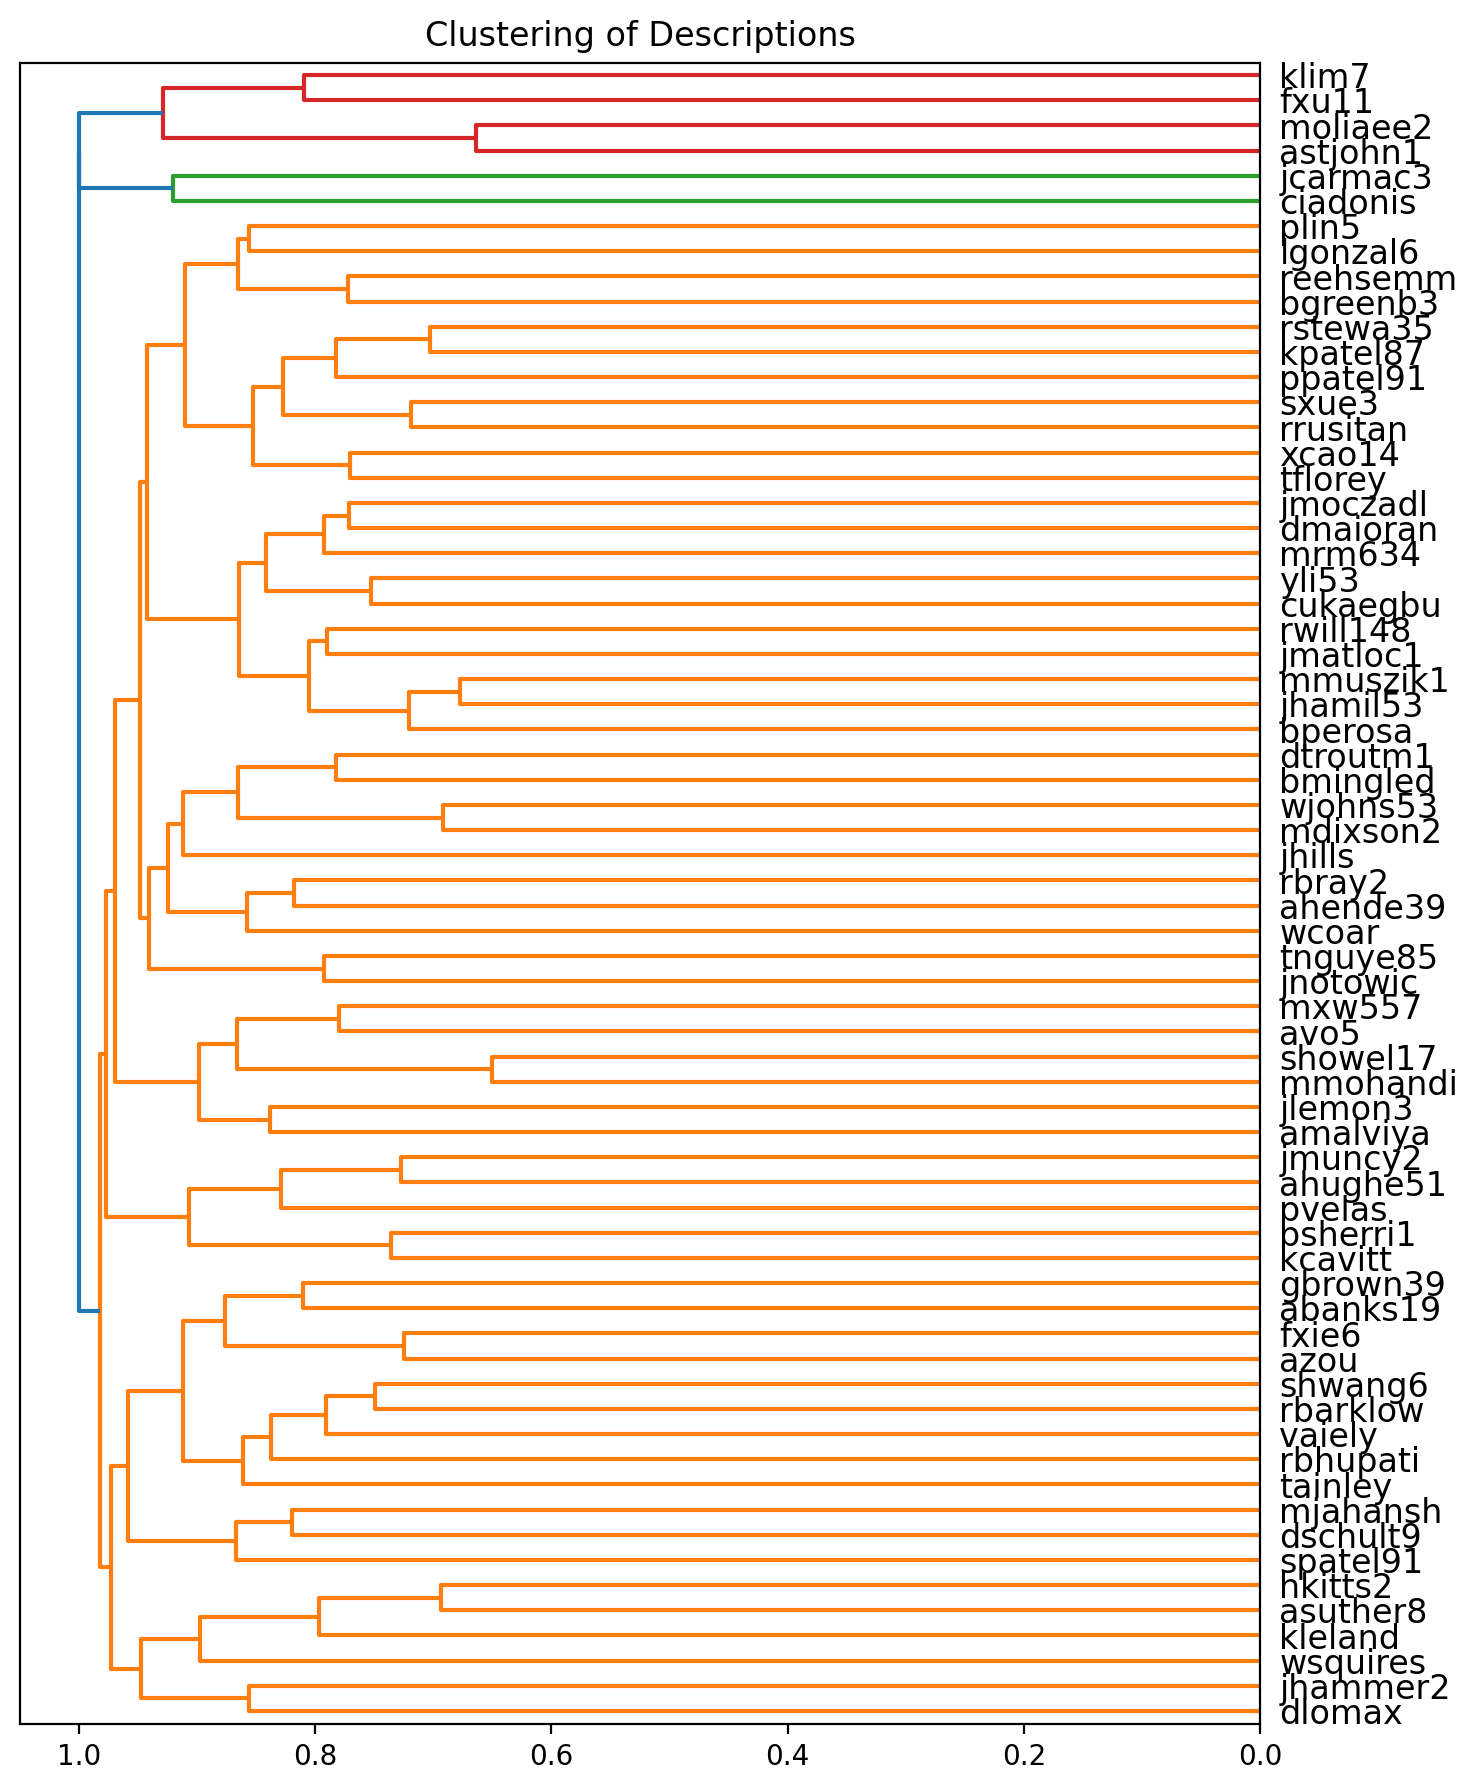

In [33]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
print(minVal)
d1 = len(files)-1
ij = np.where(dist1==minVal)[0][0]
for i in range(0,d1):
    for j in range (i+1,d1):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =12
               )
for j in range (10):
  for i in range (6):
     sys.stdout.write(flab[ddata['leaves'][j*6+i]]+' ')
  sys.stdout.write('\n')
for i in range (10*6, d1+1):
  sys.stdout.write(flab[ddata['leaves'][i]]+' ')
sys.stdout.write('\n')        

plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")

# Investigate interactive graph

In [34]:

import networkx as nx
import json

# use these distances to create a graph by cutting links below .2 
nxg = nx.Graph()
for i in range(len(files)-1):
    nxg.add_node(i, label=flab[i], tooltip=flab[i])
for i in range(len(files)-1):    
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):        
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            if i != j: jMax = j
        if (df.iloc[i,j] > .2):
            nLinks += 1
            nxg.add_edge(i, j, weight=math.sqrt(df.iloc[i,j]*150+1),color='yellow')
    if nLinks == 0:
        nxg.add_edge(i, jMax, weight=10,color='red')
        
print (nxg.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]


In [35]:
import ipycytoscape
import json

undir = ipycytoscape.CytoscapeWidget()
undir.graph.add_graph_from_networkx(nxg)
undir.set_style([ 
                    {
                        'selector': 'node',
                        'css': {
                            'content': 'data(label)',
                            'text-valign': 'center',
                            'color': 'black',
                            'text-size': 40,
                            'text-outline-width': 0,
                            'text-outline-color': 'green',
                            'background-color': 'yellow'
                        }
                    },
    
                    {   'selector': 'node',
                        'style': {
                          'font-size':'40px',
                          'label': 'data(label)'
                        }
                    }, 
                   { 'selector': 'edge',
                        'style': {
                            'width': 'data(weight)'
                        }
                   }

])
undir.set_layout(name='cola',nodespacing=2,animate=True)
undir.set_tooltip_source('tooltip')
display(undir)



CytoscapeWidget(cytoscape_layout={'name': 'cola', 'nodespacing': 2, 'animate': True}, cytoscape_style=[{'selec…